# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [40]:
from sklearn import datasets

# sklearn.datasets.load_digits(n_class=10, return_X_y=False)
# n_class:  產生幾種class
# return_X_y預設為false，回傳的是一種名為Bunch的結構，裡頭有data, target甚至還有image
digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

In [41]:
# sklearn.decomposition.PCA(n_components=None, copy=True, 
#                           whiten=False, svd_solver=’auto’, 
#                           tol=0.0, iterated_power=’auto’, 
#                           random_state=None)

from sklearn.decomposition import PCA
# n_components=3 : 留下三個Feature
pca = PCA(n_components=3)

pca.fit(X)
X = pca.transform(X)

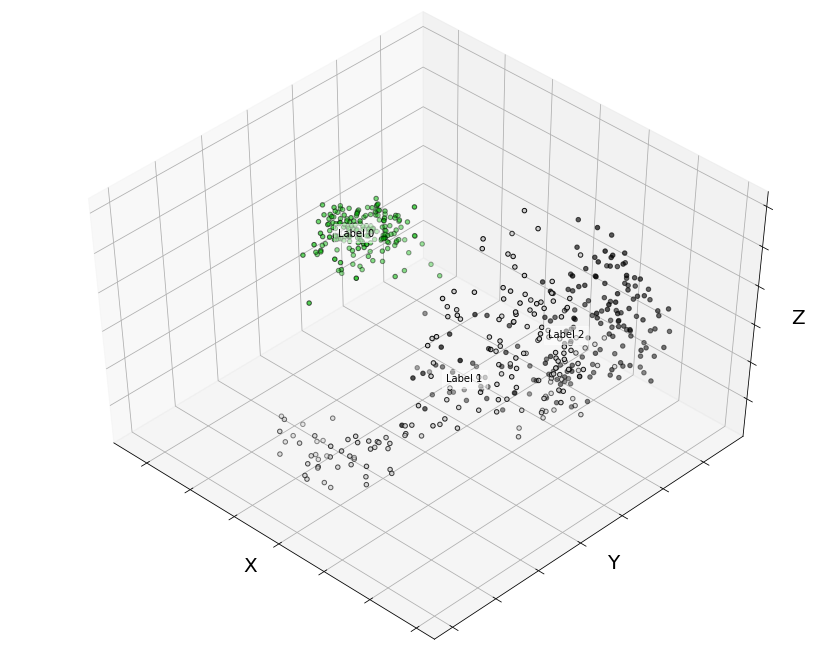

In [42]:
# 3D繪圖
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
# 見https://matplotlib.org/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html#mpl_toolkits.mplot3d.axes3d.Axes3D
# rect: (left, bottom, width, height) axes position
# elev: 檢視的仰角角度
# azim: 方位角
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('Label 0', 0), ('Label 1', 1), ('Label 2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
        edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)

plt.show()